In [2]:
import pandas as pd
import numpy as np
import re
import glob
import math
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
path = "/Volumes/SSD/00_Data_Processing/Pre_processed/05_Debbies_gaze" 

  
# csv files in the path
files = glob.glob(path + "/*.csv")
  
# defining an empty list to store 
# content
data_frame = pd.DataFrame()
content = []
  
# checking all the csv files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    One_participant = pd.read_csv(filename)
    One_participant.drop(columns=['Unnamed: 0', 'level_0','Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True)
    print(filename[-10:-4])
    content.append(One_participant)

# converting content to data frame
data_frame = pd.concat(content)

0479_2
0479_3
0479_5
1754_1
1754_2
1754_3
1754_4
1754_5
2258_1
2258_2
2258_3
2258_4
2258_5
2361_2
2361_3
2361_4
2361_5
2693_1
2693_2
2693_3
2693_4
2693_5
3246_1
3246_2
3246_3
3246_5
3310_1
3310_2
3310_3
3310_4
3310_5
3572_1
3572_2
3572_3
3572_4
3976_1
3976_2
3976_3
3976_4
3976_5
4176_1
4176_2
4176_3
4176_4
4176_5
4796_1
4796_2
4796_3
4796_4
4796_5
4917_1
4917_2
4917_3
4917_4
4917_5
5238_1
5238_2
5238_3
5238_4
5531_1
5531_3
5531_4
5531_5
5741_1
5741_2
5741_3
5741_4
5741_5
6642_1
6642_2
6642_3
6642_4
6642_5
7093_1
7093_2
7093_3
7093_4
7093_5
7264_1
7264_2
7264_3
7264_4
7264_5
7412_1
7412_2
7412_3
7412_4
7412_5
7842_1
7842_2
7842_3
7842_4
7842_5
8007_1
8007_2
8007_3
8007_4
8007_5
8469_1
8469_2
8469_3
8469_4
8469_5
8673_1
8673_2
8673_3
8673_4
8673_5
8695_2
8695_3
8695_4
8695_5
9472_1
9472_2
9472_3
9472_4
9472_5
9502_1
9502_2
9502_3
9502_5
9601_1
9601_2
9601_3
9601_4
9601_5
0479_1


In [43]:
data_frame_gaze = data_frame[data_frame.events == -2].copy()

In [4]:
data_frame_gaze.head()

,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,eyeDirectionCombinedWorld.y,...,combined_vel,thresh,isFix,corrected_vel,events,length,distance,avg_dist,names,Collider_CategoricalN
45,45,479,2,1,1.653045e+09,3,-59.114811,2.260359,34.713730,0.002027,...,12.421627,74.106757,12.421627,12.421627,-2.0,0.729616,62.769032,62.769032,Building_161,Building
56,56,479,2,1,1.653045e+09,3,-59.137642,2.259124,34.713810,0.004807,...,72.530481,74.106757,72.530481,72.530481,-2.0,0.154255,21.692028,21.692028,terrain_O.001,Background
67,67,479,2,1,1.653045e+09,3,-59.108757,2.260679,34.714069,0.032885,...,2.536672,74.106757,2.536672,2.536672,-2.0,0.166655,49.024159,49.024159,Building_162,Building
98,98,479,2,1,1.653045e+09,3,-59.094723,2.262995,34.713947,-0.009913,...,22.032337,74.106757,22.032337,22.032337,-2.0,0.411680,56.640754,56.640754,Fence_34,Background
126,126,479,2,1,1.653045e+09,3,-59.091881,2.262978,34.720425,0.156333,...,34.761886,74.106757,34.761886,34.761886,-2.0,0.343728,64.451312,64.451312,Building_161,Building


In [5]:
data_frame.tail(200)

,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,eyeDirectionCombinedWorld.y,...,combined_vel,thresh,isFix,corrected_vel,events,length,distance,avg_dist,names,Collider_CategoricalN
114358,114358,479,1,3,1.652970e+09,3,194.029144,0.963270,112.117889,0.012810,...,114.240940,88.953345,NaN,114.240940,-1.0,0.078367,31.058085,31.058085,TaskBuilding_14,TaskBuilding_Public
114359,114359,479,1,3,1.652970e+09,3,194.029587,0.963335,112.117416,0.013783,...,40.034954,88.953345,40.034954,40.034954,2.0,0.177567,30.210592,30.210592,TaskBuilding_14,TaskBuilding_Public
114360,114360,479,1,3,1.652970e+09,3,194.014359,0.962926,112.117325,0.015348,...,25.234250,88.953345,25.234250,25.234250,NaN,0.177567,30.210592,30.210592,TaskBuilding_14,TaskBuilding_Public
114361,114361,479,1,3,1.652970e+09,3,194.014725,0.962976,112.116272,0.023475,...,45.368202,88.953345,45.368202,45.368202,NaN,0.177567,30.210592,30.210592,TaskBuilding_14,TaskBuilding_Public
114362,114362,479,1,3,1.652970e+09,3,194.016617,0.963007,112.115677,0.023176,...,24.086715,88.953345,24.086715,24.086715,NaN,0.177567,30.210592,30.210592,TaskBuilding_14,TaskBuilding_Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114553,114553,479,1,3,1.652970e+09,3,192.045654,0.856509,117.302483,-0.070025,...,5.485483,88.953345,5.485483,5.485483,NaN,0.377951,30.086212,30.588177,pavement_Ua6.001,Background
114554,114554,479,1,3,1.652970e+09,3,191.983978,0.854405,117.395813,-0.070558,...,2.650226,88.953345,2.650226,2.650226,NaN,0.377951,29.976128,30.588177,pavement_Ua6.001,Background
114555,114555,479,1,3,1.652970e+09,3,191.920563,0.852232,117.488960,-0.069931,...,1.563231,88.953345,1.563231,1.563231,NaN,0.377951,29.865280,30.588177,pavement_Ua6.001,Background
114556,114556,479,1,3,1.652970e+09,3,191.885880,0.851057,117.535599,-0.070915,...,4.908952,88.953345,4.908952,4.908952,NaN,0.377951,29.803810,30.588177,pavement_Ua6.001,Background


In [6]:
data_frame.iloc[114348:114378,[21,34]]

,hitObjectColliderName,Interpolated_collider
114348,road_playground.002,road_playground.002
114349,terrain_I.001,terrain_I.001
114350,terrain_I.001,terrain_I.001
114351,terrain_I.001,terrain_I.001
114352,terrain_I.001,terrain_I.001
114353,road_playground.002,road_playground.002
114354,terrain_I.001,terrain_I.001
114355,terrain_I.001,terrain_I.001
114356,terrain_I.001,terrain_I.001
114357,terrain_I.001,terrain_I.001


In [8]:
data_frame.combinedGazeValidityBitmask.value_counts()

3    13240677
0      836959
Name: combinedGazeValidityBitmask, dtype: int64

In [52]:
Blinks = pd.DataFrame(data_frame.groupby(["SubjectID", "Session"])["combinedGazeValidityBitmask"].value_counts(normalize=True))
Blinks.rename(columns ={"combinedGazeValidityBitmask": "Percentage"}, inplace=True)
Blinks.reset_index(inplace=True)
Blinks.loc[:, 'Validity'] = Blinks['combinedGazeValidityBitmask'].replace( {3:"Valid", 0:"Invalid"})

In [53]:
Blinks.head()

,SubjectID,Session,combinedGazeValidityBitmask,Percentage,Validity
0,479,1,3,0.966297,Valid
1,479,1,0,0.033703,Invalid
2,479,2,3,0.963621,Valid
3,479,2,0,0.036379,Invalid
4,479,3,3,0.934566,Valid


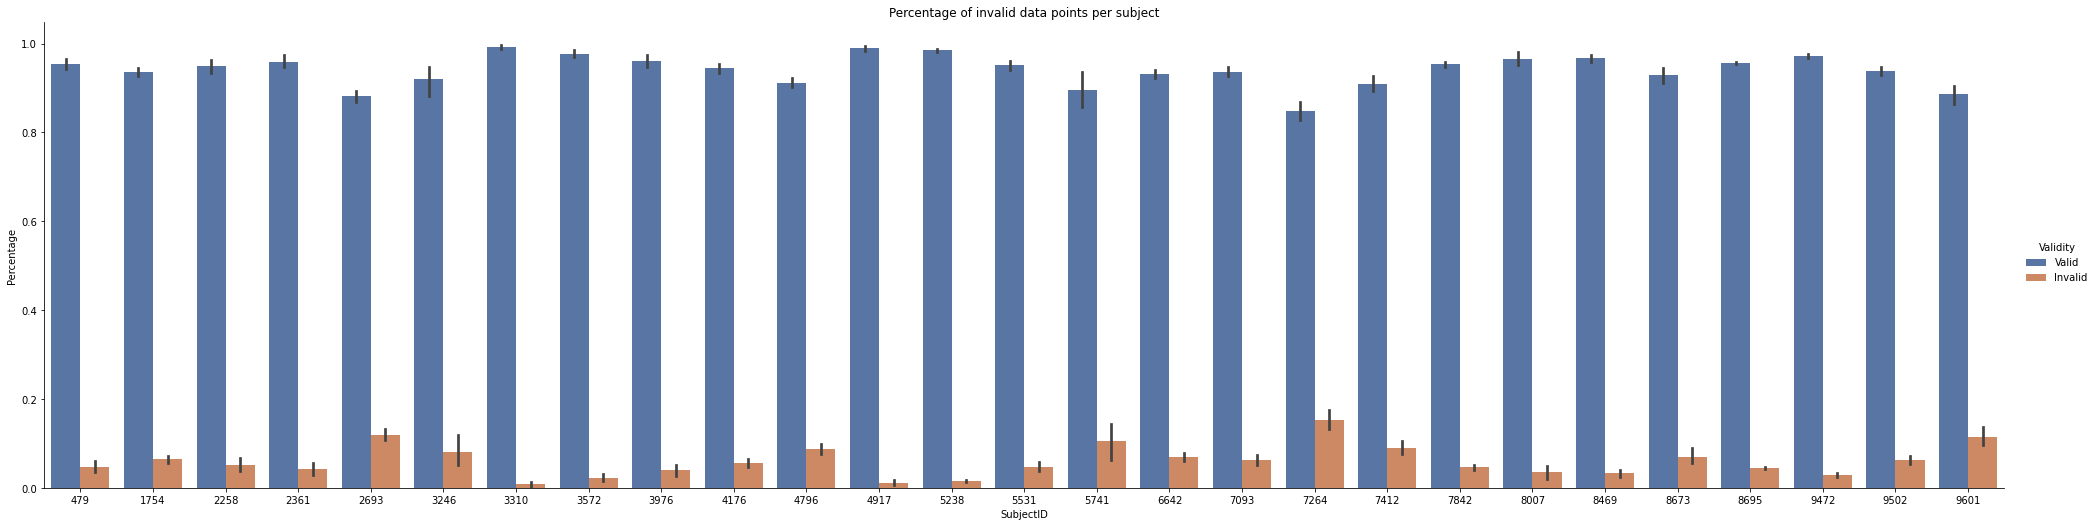

In [54]:
sns.catplot(data=Blinks, hue="Validity", y="Percentage", x="SubjectID", kind="bar", \
            height=7, aspect=4).set(title="Percentage of invalid data points per subject")

In [44]:
data_frame.Continuous_Time.describe()

count    1.407764e+07
mean     1.649533e-02
std      1.390423e-02
min      0.000000e+00
25%      0.000000e+00
50%      1.700000e-02
75%      3.300000e-02
max      5.000000e-02
Name: Continuous_Time, dtype: float64

In [41]:
data_frame_gaze["Median_Standard_Duration"] = np.nanmedian(abs(data_frame_gaze.length - np.nanmedian(data_frame_gaze.length))) * 1.4826
data_frame_gaze["gaze_mad_z"] = abs(data_frame_gaze.length.tolist() - np.nanmedian(data_frame_gaze.length)) / data_frame_gaze.Median_Standard_Duration.tolist()
data_frame_gaze["Outlier_Gaze_Length"] = np.where(data_frame_gaze["gaze_mad_z"] > 3.5, "Out", "Stays")
data_frame_gaze_no_out = data_frame_gaze[data_frame_gaze.Outlier_Gaze_Length != "OUT"]

In [42]:
data_frame_gaze.Outlier_Gaze_Length.value_counts(normalize=True)

Stays    0.953447
Out      0.046553
Name: Outlier_Gaze_Length, dtype: float64

In [17]:
data_frame_gaze.shape

(620236, 52)

In [34]:
data_frame_gaze_no_out.head()

,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,eyeDirectionCombinedWorld.y,...,events,length,distance,avg_dist,names,Collider_CategoricalN,Median_Standard_Duration,gaze_mad_z,Oulier_Gaze_Length,Outlier_Gaze_Length
45,45,479,2,1,1.653045e+09,3,-59.114811,2.260359,34.713730,0.002027,...,-2.0,0.729616,62.801476,62.800914,Building_161,Building,0.147069,3.682855,OUT,No
55,55,479,2,1,1.653045e+09,3,-59.111675,2.260061,34.713699,-0.063207,...,-2.0,0.132926,21.819514,21.820233,terrain_O.001,Background,0.147069,0.374368,OUT,Stays
67,67,479,2,1,1.653045e+09,3,-59.108757,2.260679,34.714069,0.032885,...,-2.0,0.166655,49.043296,49.044520,Building_162,Building,0.147069,0.145030,Stays,Stays
98,98,479,2,1,1.653045e+09,3,-59.094723,2.262995,34.713947,-0.009913,...,-2.0,0.411680,56.705687,56.705109,Fence_34,Background,0.147069,1.521035,OUT,Stays
126,126,479,2,1,1.653045e+09,3,-59.091881,2.262978,34.720425,0.156333,...,-2.0,0.343728,64.290741,64.292513,Building_161,Building,0.147069,1.058991,OUT,Stays


In [57]:
summary_name_stats_fix_length = pd.DataFrame(data_frame_gaze_no_out.groupby([ "SubjectID", "Session", "names", "Collider_CategoricalN"])["length"].agg(['count','mean','median','std','max', 'min']))

In [58]:
summary_name_stats_fix_length.reset_index(inplace=True)

In [60]:
summary_name_stats_fix_length.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Complete_Data_AngularV_GROUPED.cvs")

In [47]:
summary_name_stats_fix_length.shape

(61272, 6)

In [ ]:
sns.displot(data=data_frame_gaze, x="length", hue="Collider_CategoricalN", multiple="stack")

In [9]:
summary_stats_fix_length = pd.DataFrame(data_frame_gaze_no_out.groupby(["Collider_CategoricalN", "SubjectID", "Session"])["length"].agg(['count','mean','median','std','max', 'min']))
summary_stats_fix_length.reset_index(inplace=True)

In [ ]:
summary_stats_fix_length

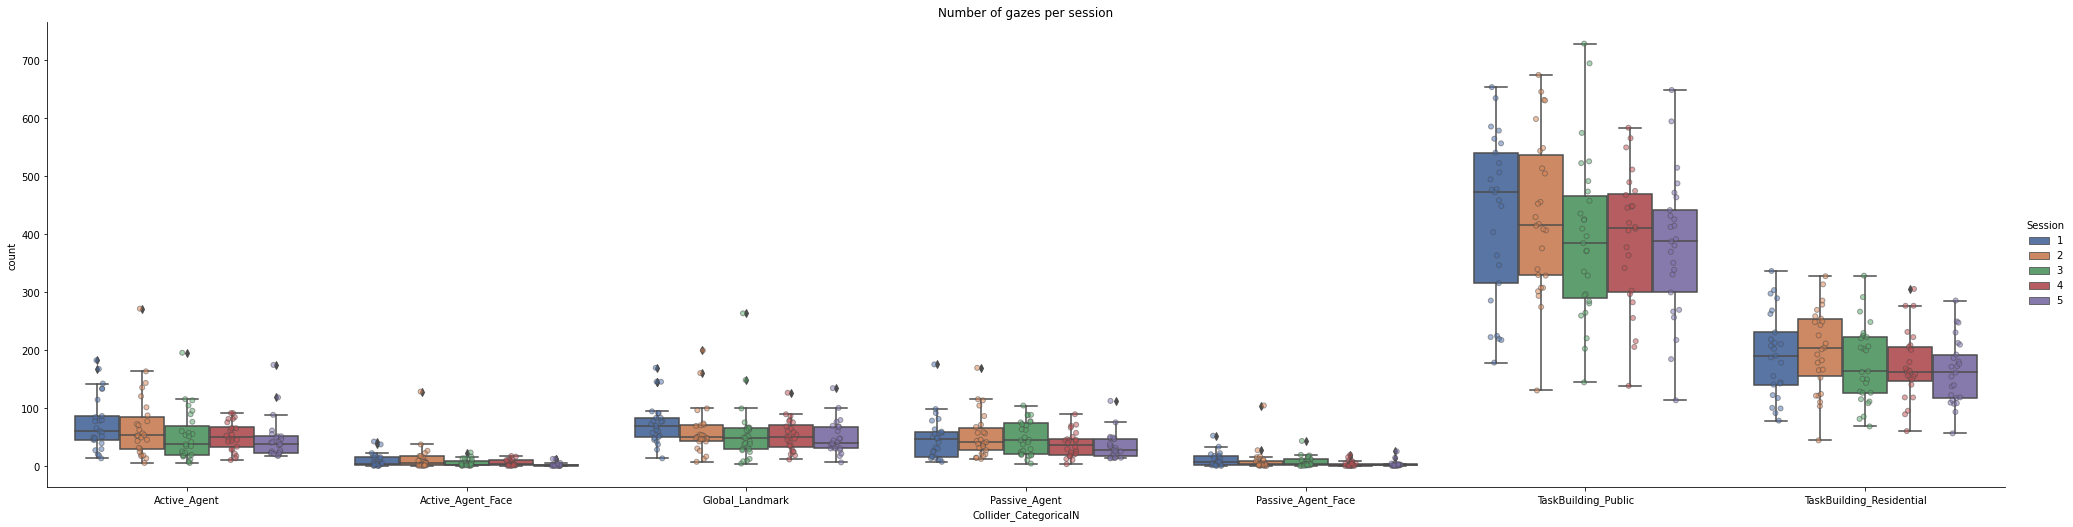

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("deep")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=7, aspect=4, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()

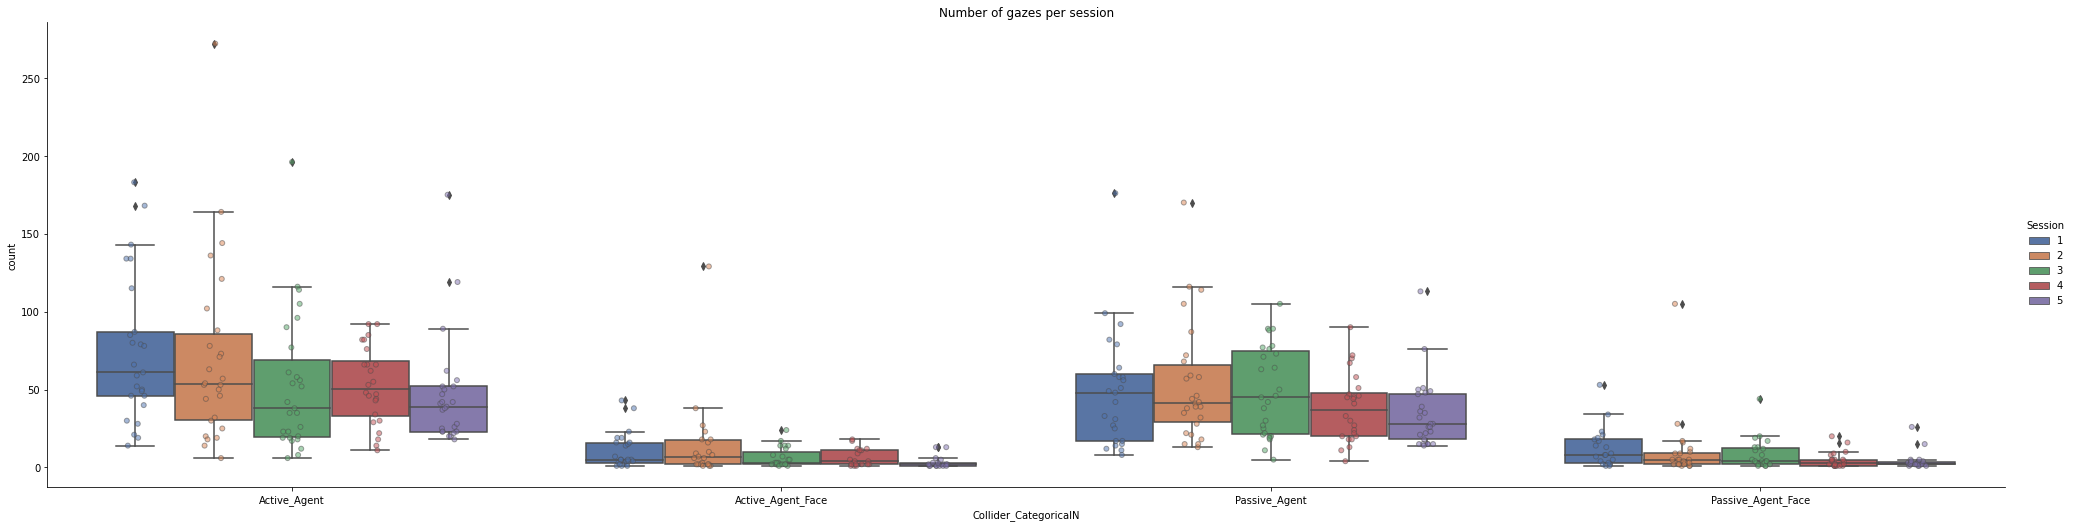

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("deep")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=7, aspect=4, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
#plt.ylim(top=100)
ax.get_legend().remove()

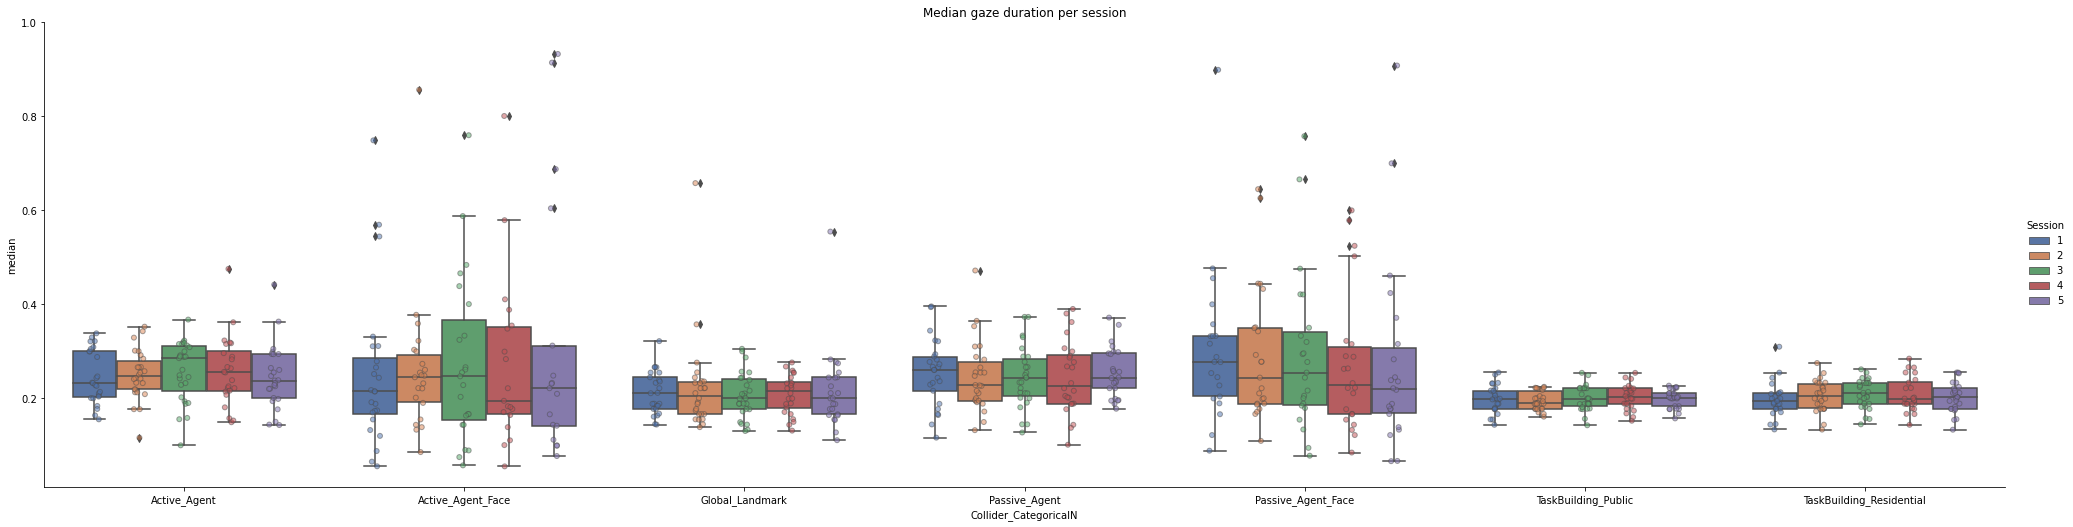

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("deep")
sns.catplot(x="Collider_CategoricalN", y="median", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=7, aspect=4, kind='box').set(title="Median gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="median",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
plt.ylim(top=1)
ax.get_legend().remove()

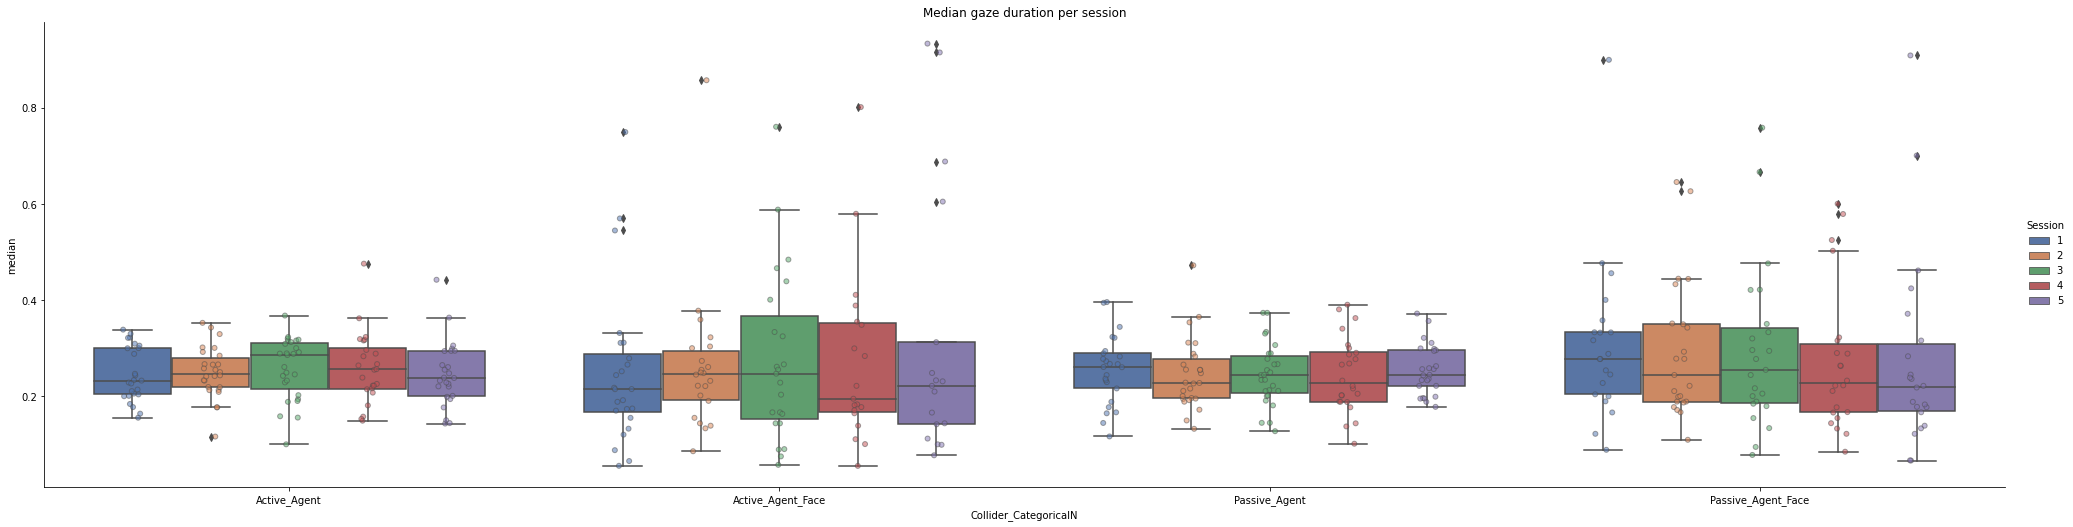

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("deep")
sns.catplot(x="Collider_CategoricalN", y="median", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=7, aspect=4, kind='box').set(title="Median gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="median",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=7, aspect=4, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
#plt.ylim(top=1)
ax.get_legend().remove()

In [ ]:
HumanA = pd.read_csv("/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv")

In [ ]:
HumanA.info()

In [ ]:
data_frame.head(50)

In [ ]:
data_frame.info()

In [ ]:
data_frame.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Complete_Data_AngularV.cvs")

In [ ]:
One_participant.columns

In [ ]:
One_participant.drop(columns=['Unnamed: 0', 'level_0','Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True)

In [ ]:
One_participant.events.value_counts()

In [ ]:
One_participant['avg_shift'] = One_participant['avg_dist'].shift(1) != One_participant['avg_dist']

In [ ]:
data_frame.iloc[115318:115322,6:9]

In [ ]:
data_frame.info()

In [ ]:
One_participant.iloc[115521:115532,45:50]

In [ ]:
One_participant.iloc[115318:115322,6]

In [ ]:
One_participant.iloc[115322,6] - One_participant.iloc[115318,6]

In [ ]:
One_participant.iloc[115532,6] - One_participant.iloc[115521,6]

In [ ]:
One_participant.tail(200)

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
import pandas as pd
import numpy as np

# create example dataframe
df = pd.DataFrame({'case': [1, np.nan, np.nan, -1, np.nan, 2, np.nan, np.nan, -2, np.nan, np.nan, np.nan, 2, np.nan, -1]})

# fill NaN values with 0
df_filled = df.fillna(0)

# use boolean indexing to check if the ordering is correct within each group
mask = ((df_filled['case'] != 2) | (df_filled['case'].shift(-1).fillna(0) == -2)) & \
       ((df_filled['case'] != 1) | (df_filled['case'].shift(-1).fillna(0) == -1))

# print rows where the condition is False
print(df[~mask])

In [ ]:
df